## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jul 29 15:54:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
%cd ./drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/

/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

100% 137M/137M [00:00<00:00, 189MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 117.2ms
Speed: 2.1ms preprocess, 117.2ms inference, 587.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


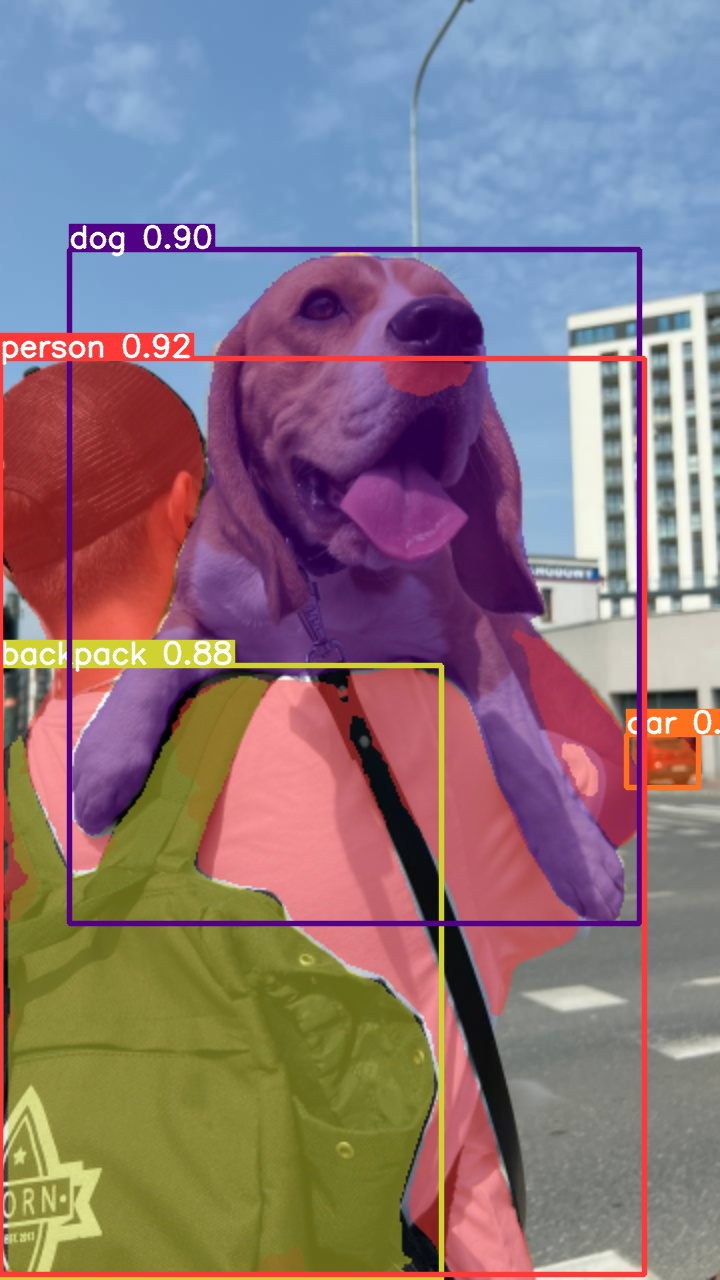

In [ ]:
Image(filename='runs/segment/predict2/dog.jpeg', height=600)

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

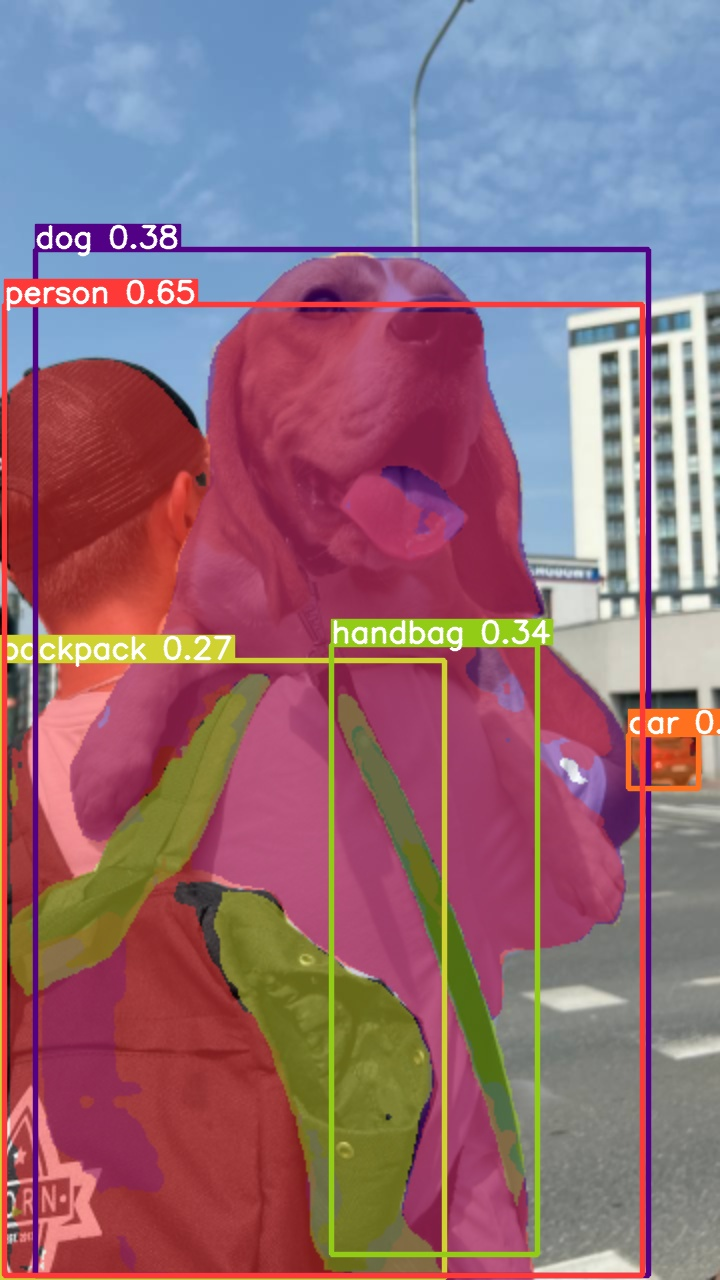

In [ ]:
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 75.5ms
Speed: 0.5ms pre-process, 75.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
%cd ./datasets

/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets


In [ ]:
#!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i3zhmUz9Uy0Jy4nLe4Se")
project = rf.workspace("tugas-akhir-c3gmk").project("coral-segmentation-1")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coral-Segmentation-1-6 in yolov8:: 100%|██████████| 1522/1522 [00:09<00:00, 157.56it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6JbH0nK6ciAclQ1gsnva")
project = rf.workspace("gilang-dwi-aprianto-eegin").project("color-water")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.68, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Color-water-1 in yolov8:: 100%|██████████| 92/92 [00:00<00:00, 148.98it/s]


## Custom Training

In [ ]:
%cd ..

/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation


In [ ]:
!pwd

/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation


In [ ]:
!pip install -U ultralytics

  Using cached ultralytics-8.2.68-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.68-py3-none-any.whl (828 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [46]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/data.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

In [47]:
%cd ./drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/
!pwd

[Errno 2] No such file or directory: './drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/'
/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation
/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation


In [48]:
!ls ./runs/segment/train19/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    weights
confusion_matrix.png				    results.csv
events.out.tfevents.1722278379.c44d05026106.9481.0  results.png


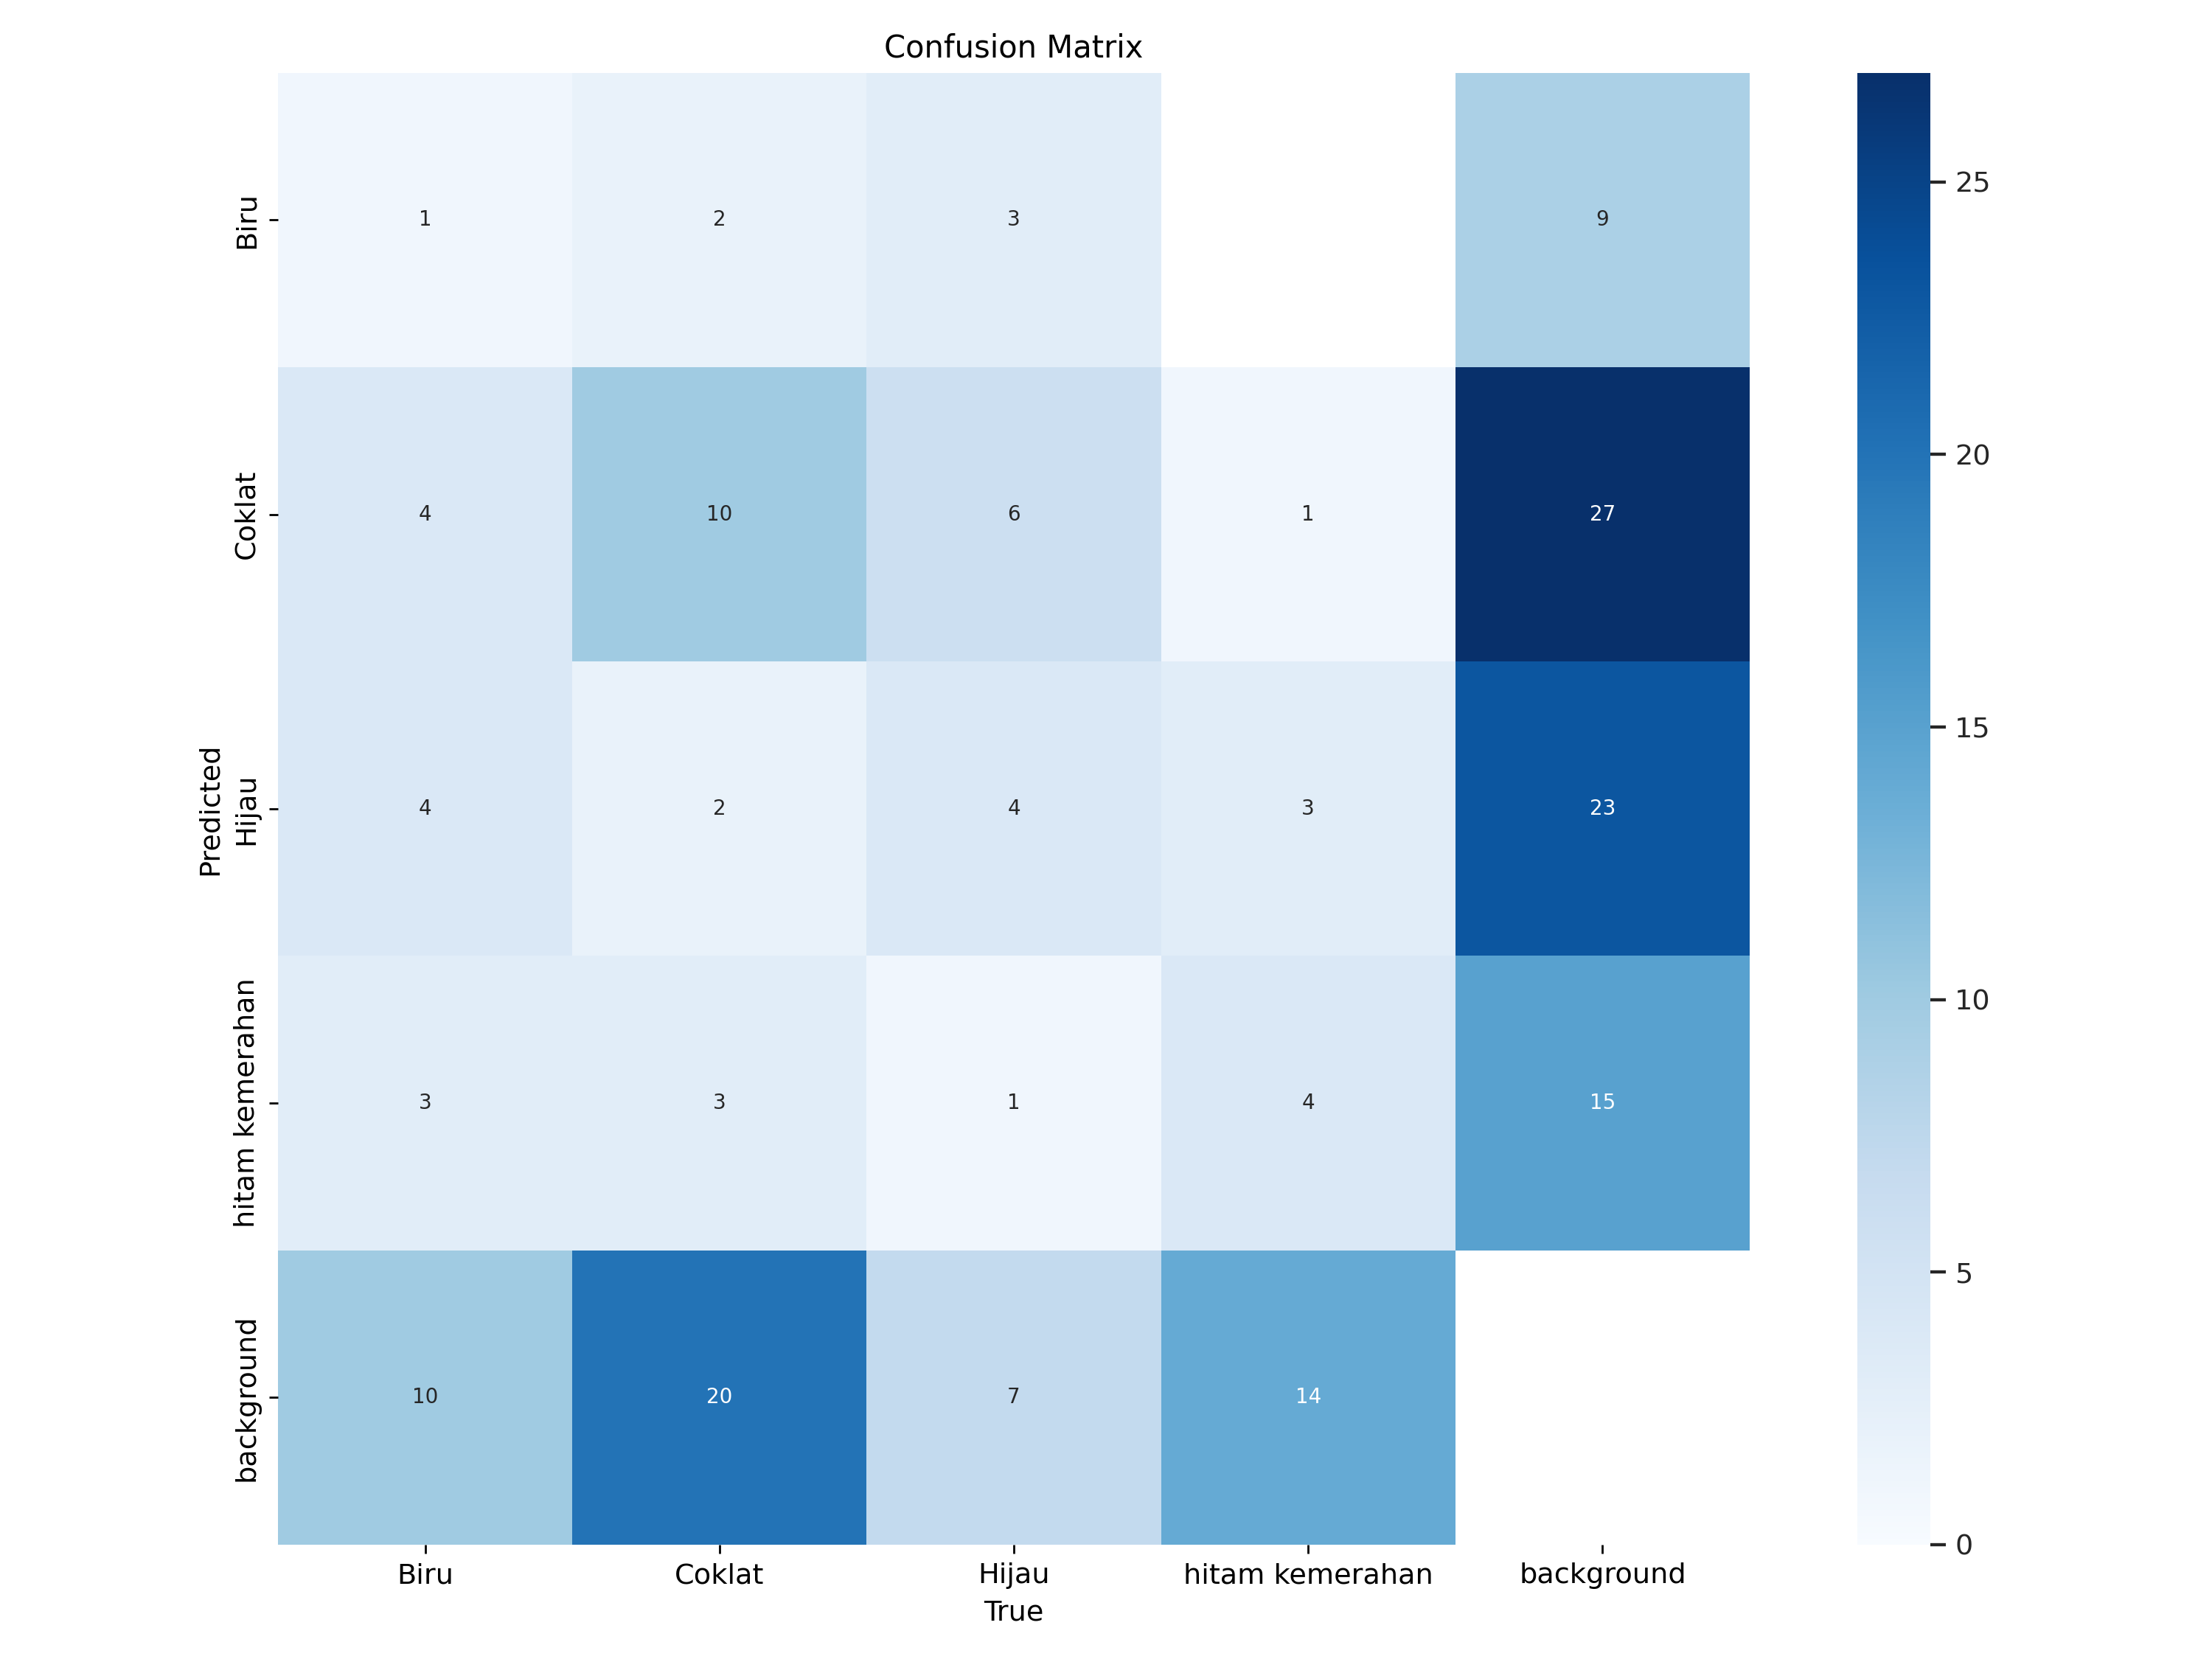

In [51]:
from IPython.display import Image, display
Image(filename='./runs/segment/train19/confusion_matrix.png', width=600)

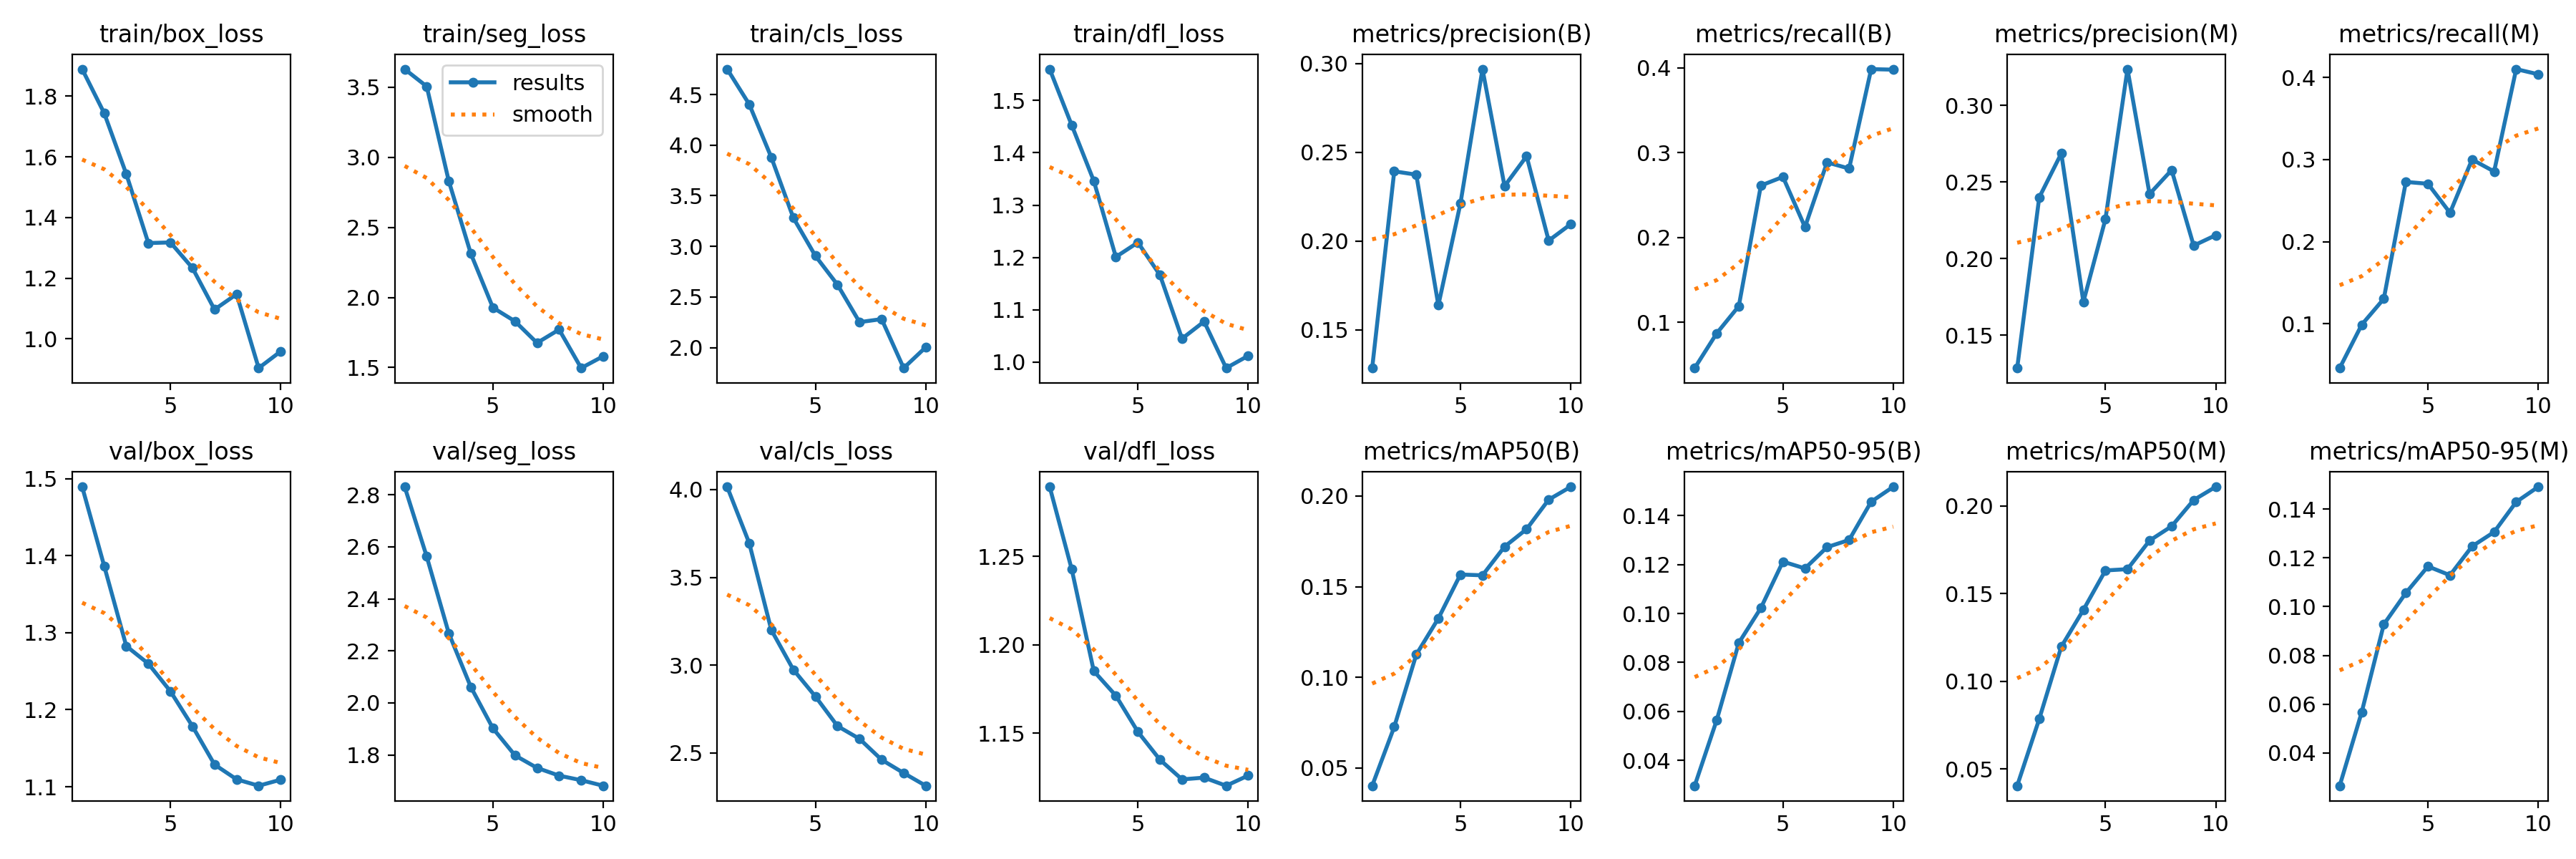

In [52]:
Image(filename='./runs/segment/train19/results.png', width=600)

/content


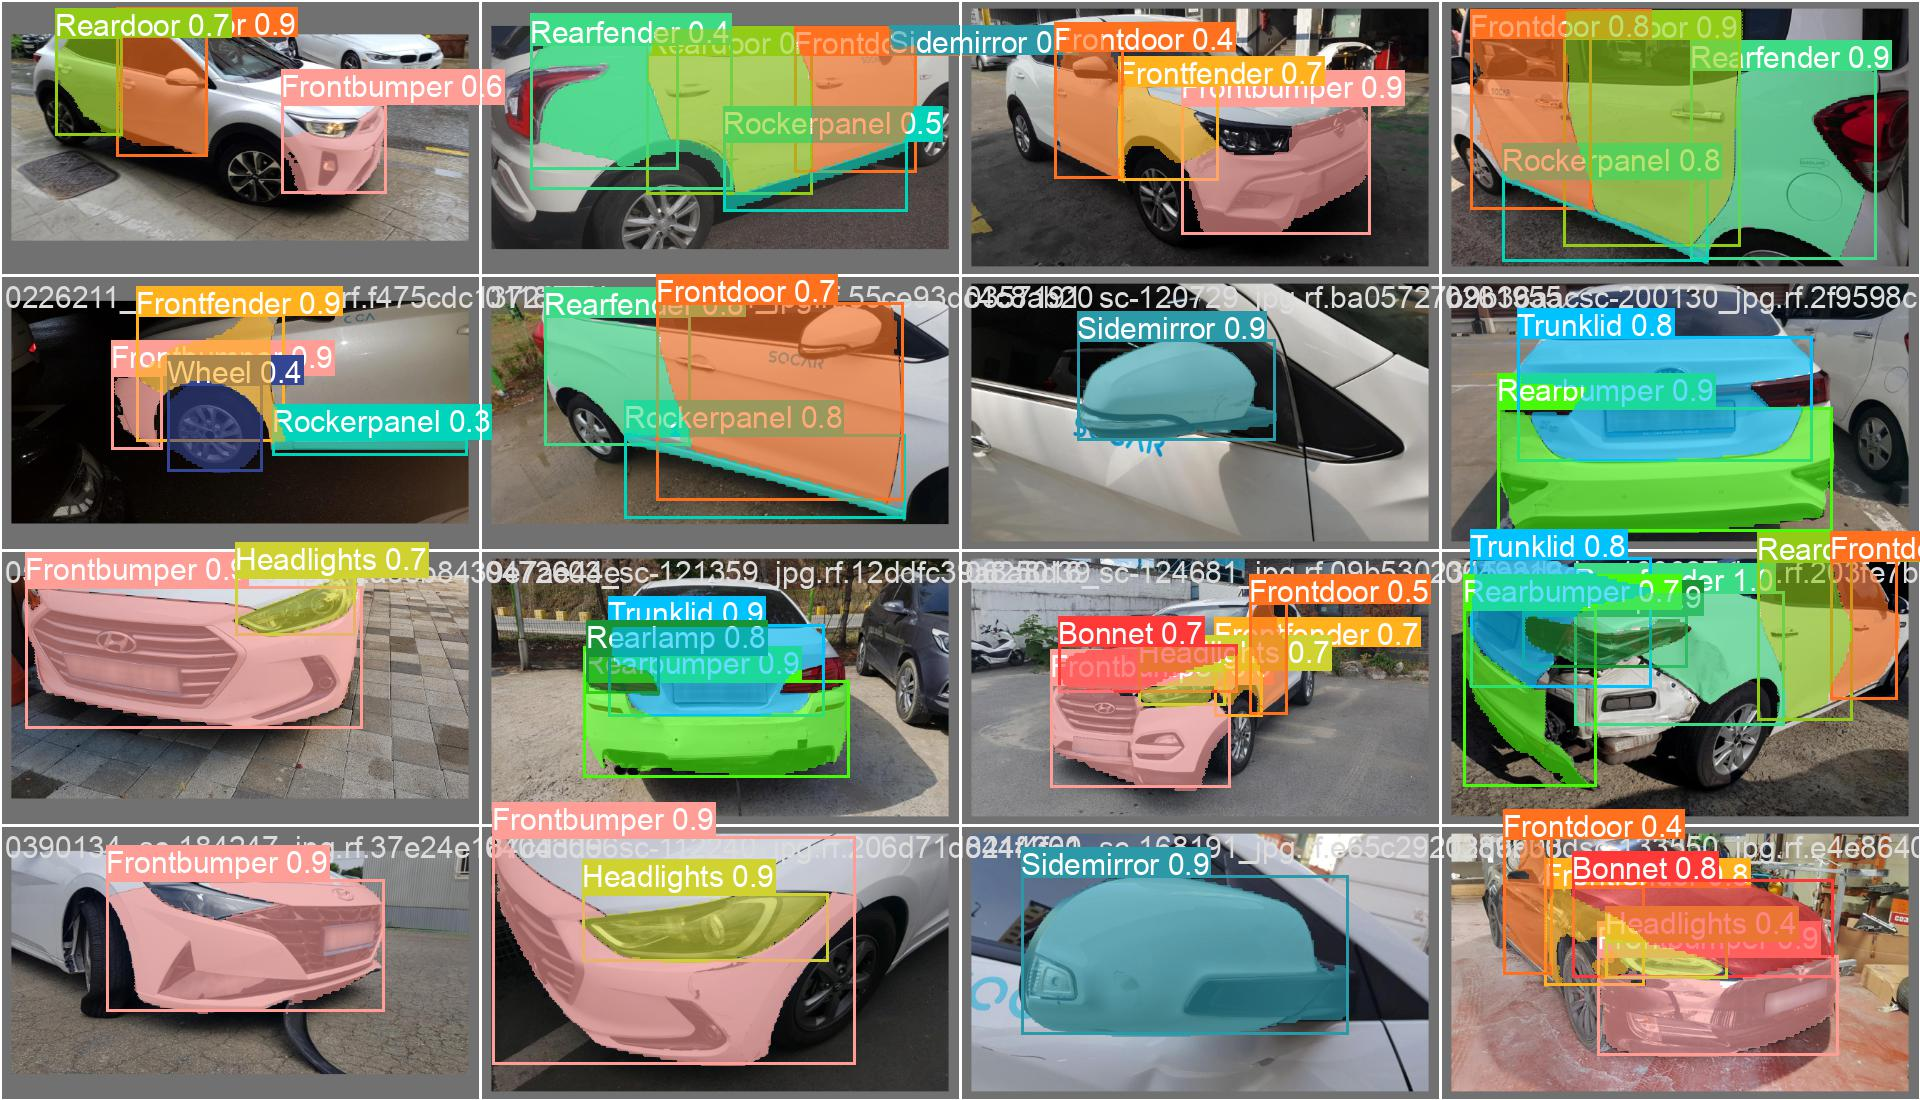

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd ./drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/

In [53]:
!pwd

/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation


In [57]:
!yolo task=segment mode=val model=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/runs/segment/train19/weights/best.pt data=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/data.yaml

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:07<00:00,  7.81s/it]
                   all          8        102      0.209      0.396      0.206      0.152      0.215      0.403      0.212       0.15
                  Biru          5         22      0.232      0.318      0.199      0.173      0.233      0.318      0.206      0.167
                Coklat          6         37      0.222      0.425      0.187     0.0999       0.22       0.42      0.188      0.115
                 Hijau          4         21      0.186      0.524  

## Inference with Custom Model

In [59]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/runs/segment/train19/weights/best.pt conf=0.25 source=/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/test/images save=true

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs

image 1/4 /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/test/images/data2_jpg.rf.ecd7a74812245955ebd5662c4313cc88.jpg: 352x640 3 Birus, 2 Coklats, 4 Hijaus, 606.8ms
image 2/4 /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/test/images/data36_jpg.rf.43a28dc19000972af5436dcab3cbcf90.jpg: 352x640 3 Birus, 11 Coklats, 2 Hijaus, 1 hitam kemerahan, 553.7ms
image 3/4 /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/test/images/data37_jpg.rf.6c321da5488b59ebabe18133d628bc2f.jpg: 352x640 2 Birus, 7 Coklats, 1 Hijau, 2 hitam kemerahans, 511.8ms
image 4/4 /content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/datasets/Color-water-1/test/images/data8_jpg.rf.1a84a290ca8552328

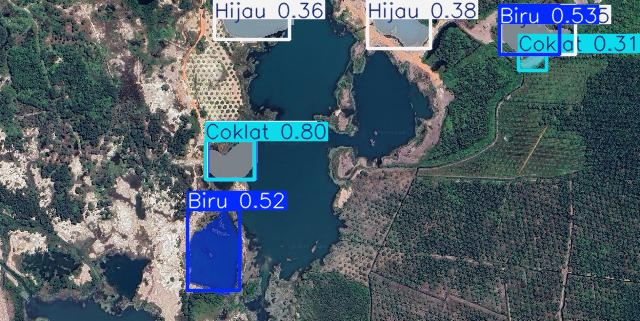

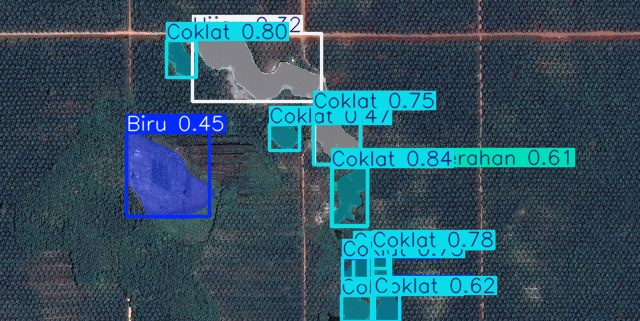

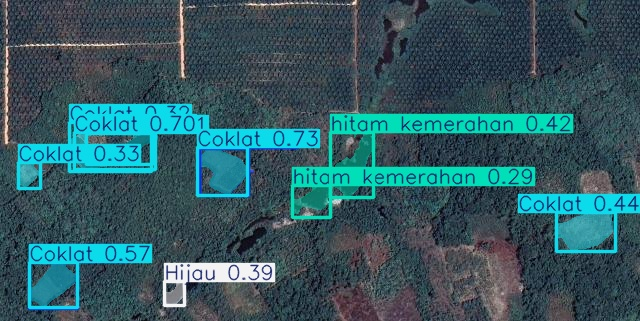

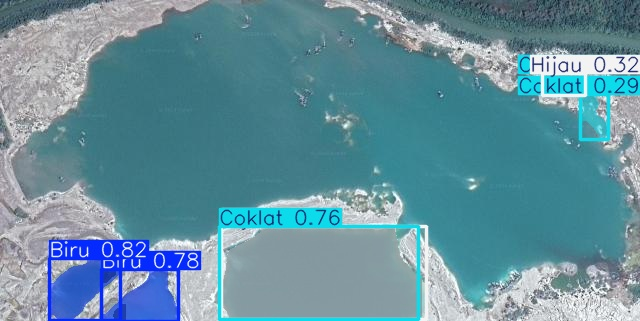

In [64]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/runs/segment/predict4/*.jpg')[:4]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8s-seg", model_path="/content/drive/MyDrive/DL_projects_colab/Yolov8_Instance_Sengmentation/runs/segment/train/")